# <b>Formula 1 <b>

<b> 1950 - 2020 <b>

What is Formula One? Formula one is a widely accepted sport in which cars race in every corner of the globe. Formula One cars are designed and engineered with the overarching goal of speed, aerodynamics, practicallity and looks. Notable Formula One teams includ Mercedes, Red Bull, Mclaren, Aston Martin and Ferrari. Formula One can cars reach up to 370km/h or  230mph and therefore are a specticale to watch all around the world.

Part 1: Constructors Championship Results 

Part 2: Driver Championship Results

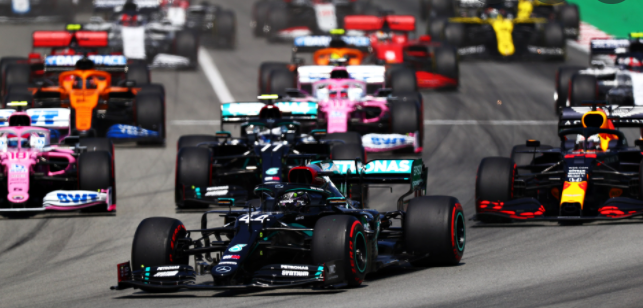

In [126]:
# Initial Library Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
%matplotlib inline
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

<b> Part 1: Constructors Championships<b>

In [127]:
# Constructors Team Analysis
const = pd.read_csv('constructors_championship_1958-2020.csv')
# Checking for missing data
const.isna().any()

Unnamed: 0    False
Year          False
Position      False
Team          False
Points        False
dtype: bool

In [128]:
# Can proceed as no missing data
const.head()

,Unnamed: 0,Year,Position,Team,Points
0,0,1958,1,Vanwall,48
1,1,1958,2,Ferrari,40
2,2,1958,3,Cooper Climax,31
3,3,1958,4,BRM,18
4,4,1958,5,Maserati,6


In [129]:
const.describe()

,Unnamed: 0,Year,Points
count,655.000000,655.000000,655.000000
mean,327.000000,1990.279389,62.404580
std,189.226496,17.230843,112.179927
min,0.000000,1958.000000,0.000000
25%,163.500000,1976.000000,6.500000
50%,327.000000,1990.000000,23.000000
75%,490.500000,2005.000000,66.000000
max,654.000000,2020.000000,765.000000


In [130]:
# Team Wins Overtime

#Removing all teams without any points
gry=const
gry['Position'] = pd.to_numeric(gry['Position'], errors='coerce')
gry = gry[gry.Position == 1]

team_win_c= gry.groupby('Team')['Team'].count()
team_win_c = pd.DataFrame(team_win_c)
team_win_c.columns = ['Wins']
team_win_c.reset_index(level=0, inplace=True)

team_win_c.sort_values(by=['Wins'], inplace=True, ascending=False)
team_win_c = team_win_c.head(10)
team_win_c = team_win_c[::-1]

fig = px.bar(team_win_c, x='Team', y='Wins',color='Wins',width=750, height=500)
fig.update_layout(title={'text': 'Teams with The Most Grand Prix Won from 1958 - 2020','y':0.95,'x':0.5})
fig.show()

In [131]:
Winsubset = const[const['Year']>1999]
Winsubset.head()

,Unnamed: 0,Year,Position,Team,Points
432,432,2000,1.0,Ferrari,170
433,433,2000,2.0,McLaren Mercedes,152
434,434,2000,3.0,Williams BMW,36
435,435,2000,4.0,Benetton Playlife,20
436,436,2000,5.0,BAR Honda,20


In [132]:
gry1=Winsubset
gry1['Position'] = pd.to_numeric(gry1['Position'], errors='coerce')
gry1 = gry1[gry1.Position == 1]

team_win_c= gry1.groupby('Team')['Team'].count()
team_win_c = pd.DataFrame(team_win_c)
team_win_c.columns = ['Wins']
team_win_c.reset_index(level=0, inplace=True)

team_win_c.sort_values(by=['Wins'], inplace=True, ascending=False)
team_win_c = team_win_c.head(10)
team_win_c = team_win_c[::-1]

fig = px.bar(team_win_c, x='Team', y='Wins',color='Wins',width=750, height=500)
fig.update_layout(title={'text': 'Teams with The Most Grand Prix Won from 2000 - 2020','y':0.95,'x':0.5})
fig.show()

In [133]:
Top_team_points=Winsubset[["Points","Team"]].groupby('Team').sum()
Top_team_points.sort_values(by=['Points'], inplace=True, ascending=False)
print(Top_team_points.head())

                         Points
Team                           
Ferrari                    6032
Mercedes                   5685
McLaren Mercedes           2676
Red Bull Racing Renault    2298
Renault                    1465


<b> Which team has been on podium the most over the last 20 years?<b> 

In [134]:
best=Winsubset
Top_team_points=best[["Points","Team"]].groupby('Team').sum()
Top_team_points=best[best['Position'].isin([1,2,3])]
ax= px.treemap(Top_team_points,path=["Team"],title="Driver from a team with Podium Finish")
ax.show()

Apparent that Ferrari are often finishing in podium position but are they wining? 

In [135]:
Winsubset1 = const[const['Year']>2010]
gry1=Winsubset1
team_points=gry1[["Points","Team"]].groupby('Team').sum()
team_points=gry1[gry1['Position'].isin([1])]
treeplot2010= px.treemap(team_points,path=["Team"],title="Finishing in First Place since 2010")



treeplot2010.show()

Since 2010, Ferrari have not won a race while Mercedes and Red Bull have won them all

In [136]:
best2020=const
best2020["Year"] = pd.to_numeric(const["Year"])
best2020=best2020[best2020['Year'].isin([2015,2016,2017,2018,2019,2020])]
best2020["Points"] = pd.to_numeric(best2020["Points"])
best2020.sort_values(by=['Points'], inplace=True, ascending=True)
dfp = best2020.groupby(["Team"]).agg({"Points":"sum"}).loc[lambda d: d["Points"].gt(100)]
dfp =dfp.sort_values('Points', ascending=True)
px.bar(dfp, x=dfp.index, y="Points", color="Points")

<b> Findings: <b> 

Ferrari was a strong team up until 2010 in which they were no longer wining constructors championships. Although Ferrari and Mercedes have the same amount of wins, Mercedes has 7 wins within since 2010 while Ferrari has none. Similarly, it appears Red bull has become a more competitive team with 3 constructors championships in 2010, 2011  and 2012. Since 2015, Mercedes has racked up the most overall points of above 4000, while Ferrari in second has 2554 points.

-

<b> Part 2: Team Driver Analysis <b>

In [153]:
driver = pd.read_csv('drivers_championship_1950-2020.csv')
driver.head()

,Unnamed: 0,Year,Position,Name,Driver Tag,Nationality,Team,Points
0,0,1950,1,Nino Farina,FAR,ITA,Alfa Romeo,30.0
1,1,1950,2,Juan Manuel Fangio,FAN,ARG,Alfa Romeo,27.0
2,2,1950,3,Luigi Fagioli,FAG,ITA,Alfa Romeo,24.0
3,3,1950,4,Louis Rosier,ROS,FRA,Talbot-Lago,13.0
4,4,1950,5,Alberto Ascari,ASC,ITA,Ferrari,11.0


In [155]:
driver.describe()

,Unnamed: 0,Year,Points
count,1575.000000,1575.000000,1575.000000
mean,787.000000,1985.193016,27.820952
std,454.807652,20.768270,53.683241
min,0.000000,1950.000000,0.000000
25%,393.500000,1967.000000,3.000000
50%,787.000000,1985.000000,8.000000
75%,1180.500000,2004.000000,29.000000
max,1574.000000,2020.000000,413.000000


In [160]:
# Data cleaning - Will drop unnamed column
cleandriver = driver.drop(['Unnamed: 0'], axis=1)
cleandriver

,Year,Position,Name,Driver Tag,Nationality,Team,Points
0,1950,1,Nino Farina,FAR,ITA,Alfa Romeo,30.0
1,1950,2,Juan Manuel Fangio,FAN,ARG,Alfa Romeo,27.0
2,1950,3,Luigi Fagioli,FAG,ITA,Alfa Romeo,24.0
3,1950,4,Louis Rosier,ROS,FRA,Talbot-Lago,13.0
4,1950,5,Alberto Ascari,ASC,ITA,Ferrari,11.0
...,...,...,...,...,...,...,...
1570,2020,19,Romain Grosjean,GRO,FRA,Haas Ferrari,2.0
1571,2020,20,Kevin Magnussen,MAG,DEN,Haas Ferrari,1.0
1572,2020,21,Nicholas Latifi,LAT,CAN,Williams Mercedes,0.0
1573,2020,22,Jack Aitken,AIT,GBR,Williams Mercedes,0.0


In [159]:
gry1=cleandriver
gry1['Position'] = pd.to_numeric(gry1['Position'], errors='coerce')
gry1 = gry1[gry1.Position == 1]

driv_win_c= gry1.groupby('Name')['Name'].count()
driv_win_c = pd.DataFrame(driv_win_c)
driv_win_c.columns = ['Wins']
driv_win_c.reset_index(level=0, inplace=True)

driv_win_c.sort_values(by=['Wins'], inplace=True, ascending=False)
driv_win_c = driv_win_c.head(10)
driv_win_c = driv_win_c[::-1]

fig = px.bar(driv_win_c, x='Name', y='Wins',color='Wins',width=750, height=500)
fig.update_layout(title={'text': 'Drivers with The Most Grand Prix Won','y':0.95,'x':0.5})
fig.show()

In [158]:
# Count of points won by each top driver
topdata = cleandriver[cleandriver['Points'] >150]
driver_points=topdata[["Points","Name"]].groupby('Name').sum()
driver_points.sort_values(by=['Points'], inplace=True, ascending=False)

print(driver_points)


                  Points
Name                    
Lewis Hamilton    3522.0
Sebastian Vettel  2860.0
Valtteri Bottas   1287.0
Nico Rosberg      1195.0
Fernando Alonso   1190.0
Max Verstappen    1113.0
Kimi RÃ¤ikkÃ¶nen  1032.0
Mark Webber        878.0
Daniel Ricciardo   864.0
Jenson Button      672.0
Charles Leclerc    264.0


2020 F1 Season results

In [162]:
gry4=cleandriver
gry4["Year"] = pd.to_numeric(driver["Year"])
gry4=gry4[gry4['Year'].isin([2020])]
gry4["Points"] = pd.to_numeric(gry4["Points"])
gry4.sort_values(by=['Points'], inplace=True, ascending=True)
dfp = gry4.groupby(["Name"]).agg({"Points":"sum"}).loc[lambda d: d["Points"].gt(50)]
dfp =dfp.sort_values('Points', ascending=True)
px.bar(dfp, x=dfp.index, y="Points", color="Points")

<b> Findings: <b>  

Above data showcases the success that Lewis Hamilton has had on the track in the previous 10 years. Within all of F1, Lewis Hamilton and Michael Schumacher have both won the most grand prix championships with 7 in F1 history. Additionally, we can see the dramatic lead that Lewis Hamilton had on the rest of the competition in  terms of individual points per driver. 
